#Part 1

##1.1 Data Loading

###Task 1

In [ ]:
import pandas as pd

In [ ]:
df_food = pd.read_csv("/content/food_order.csv")


###Task 2

In [ ]:
df_food.head(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5,29,26


##1.2 Data Description

###Task 3

In [ ]:
print(df_food.dtypes)

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object


###Task 4

In [ ]:
null_values = df_food.isnull().sum()
null_values

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [ ]:
def null_rate(column_name):
    null_count = df_food[column_name].isnull().sum()
    null_rate = int(null_count / len(df_food[column_name]) * 100)
    print(f"Null rate for {column_name} column is {null_rate}%")

In [ ]:
null_rate("order_id")

Null rate for order_id column is 0%


###Task 5

In [ ]:
unique_valuees = df_food.nunique()
print(unique_valuees)

order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64


##1.3 Data Manipulation

###Task 6

In [ ]:
df_food.iloc[:, 2].values

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana', ...,
       'Blue Ribbon Sushi', "Jack's Wife Freda", 'Blue Ribbon Sushi'],
      dtype=object)

In [ ]:
df_food["total_time"] = df_food['food_preparation_time'] + df_food['delivery_time']
df_food.head(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,44
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21,49
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,63
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26,47
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5,29,26,55


##1.4 Statistics

###Task 7

In [ ]:
df_food['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

###Task 8

In [ ]:
restaurants_per_cuisin = df_food.groupby('cuisine_type')['restaurant_name'].nunique()
print(restaurants_per_cuisin)


cuisine_type
American          41
Chinese           16
French             3
Indian            14
Italian           31
Japanese          29
Korean             5
Mediterranean      5
Mexican           11
Middle Eastern     7
Southern           2
Spanish            3
Thai               9
Vietnamese         3
Name: restaurant_name, dtype: int64


##1.5 Visualization

In [ ]:
import matplotlib.pyplot as plt

###Task 9 (a)

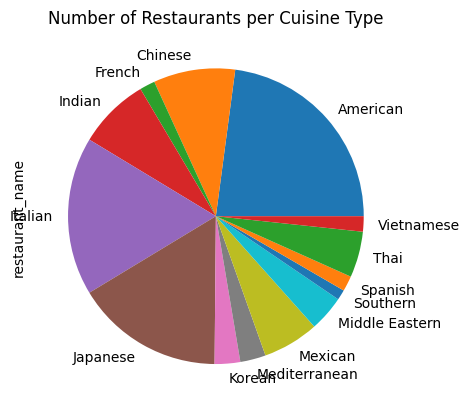

In [ ]:
restaurants_per_cuisin.plot(kind='pie')
# plt.figure(figsize=(4, 4))
# plt.subplots_adjust(left=0.3)
plt.rcParams.update({'font.size': 10})
plt.title("Number of Restaurants per Cuisine Type")
plt.show()

###Task 9 (b)

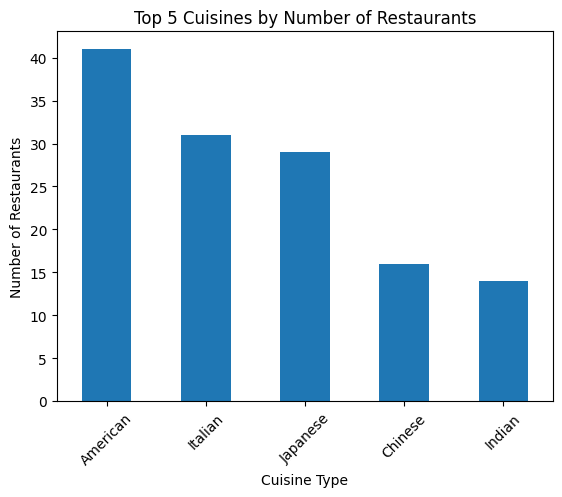

In [ ]:
top_5_cuisines = restaurants_per_cuisin.sort_values(ascending=False).head(5)
my_plot = top_5_cuisines.plot(kind='bar', rot=45)
my_plot.set_xlabel("Cuisine Type")
my_plot.set_ylabel("Number of Restaurants")
plt.title("Top 5 Cuisines by Number of Restaurants")
plt.show()

In [ ]:
top_10_restaurants = df_food.sort_values("rating", ascending=False).head(10)

top_10_restaurants

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
994,1478012,114919,Yama Japanese Restaurant,Japanese,12.66,Weekend,Not given,25,26,51
996,1476600,141912,P.J. Clarke's,American,24.25,Weekend,Not given,24,15,39
999,1477388,396432,Blue Ribbon Sushi Izakaya,Japanese,9.70,Weekend,Not given,25,15,40
1001,1476691,68775,Sushi of Gari Tribeca,Japanese,24.20,Weekend,Not given,22,21,43
1002,1476838,51356,Burger Joint,American,16.15,Weekend,Not given,31,15,46
1003,1477913,92096,Aurora,Italian,21.93,Weekend,Not given,31,18,49
1013,1476936,260035,Blue Ribbon Sushi Bar & Grill,Japanese,14.12,Weekend,Not given,31,25,56
1014,1478342,142681,Osteria Morini,Italian,8.30,Weekend,Not given,27,19,46
1016,1476961,112272,Blue Ribbon Sushi,Japanese,14.02,Weekday,Not given,35,29,64


###Task 10 (a)

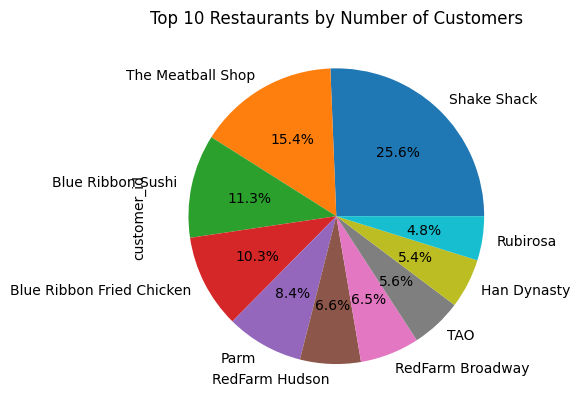

In [ ]:
customer_per_restaurant = df_food.groupby('restaurant_name')['customer_id'].nunique()
top_10_restaurants = customer_per_restaurant.nlargest(10)

my_plot = top_10_restaurants.plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 10 Restaurants by Number of Customers')
plt.show()

###Task 10 (b)

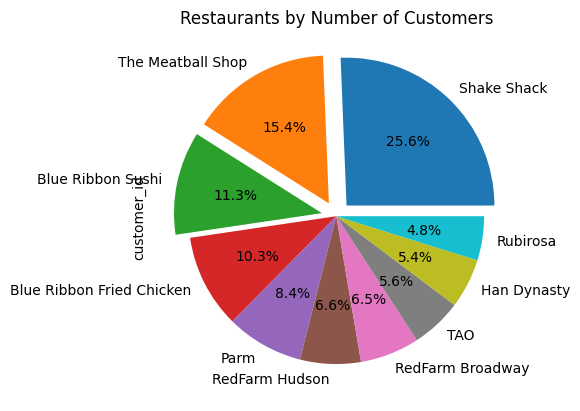

In [ ]:
top_3_restaurants = customer_per_restaurant.nlargest(3)
explode = [0.1 if x in top_3_restaurants.index else 0 for x in top_10_restaurants.index]
pie_plot = top_10_restaurants.plot(kind='pie', autopct='%1.1f%%', explode=explode)

plt.title('Restaurants by Number of Customers')
plt.show()


###Task 11

In [ ]:
restaurants_per_cuisin_10 = df_food.groupby('cuisine_type')['restaurant_name'].nunique()
top_10_cuisine = restaurants_per_cuisin_10.nlargest(10)
print(top_10_cuisine)


cuisine_type
American          41
Italian           31
Japanese          29
Chinese           16
Indian            14
Mexican           11
Thai               9
Middle Eastern     7
Korean             5
Mediterranean      5
Name: restaurant_name, dtype: int64


In [ ]:
restaurants_by_cuisine = df_food['cuisine_type'].values
print(restaurants_by_cuisine)

['Korean' 'Japanese' 'Mexican' ... 'Japanese' 'Mediterranean' 'Japanese']


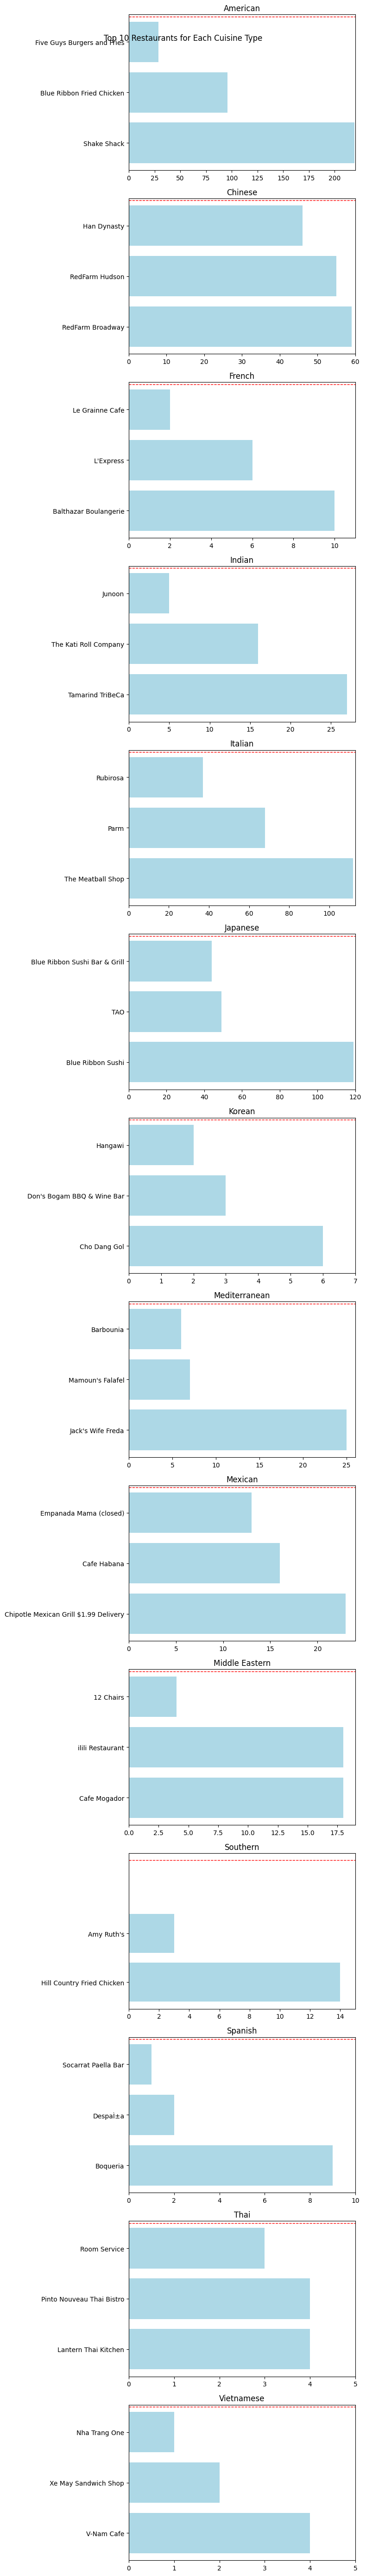

In [ ]:
counts = df_food.groupby(['cuisine_type', 'restaurant_name'])['rating'].count()


top_restaurants = {}


for cuisine in counts.index.levels[0]:
    cuisine_counts = counts[cuisine].sort_values(ascending=False)
    top_restaurants[cuisine] = cuisine_counts.iloc[:min(len(cuisine_counts), 3)]


fig, axs = plt.subplots(len(top_restaurants), figsize=(8, 4 * len(top_restaurants)))

for i, cuisine in enumerate(top_restaurants):
    top = top_restaurants[cuisine]
    axs[i].barh(top.index, top.values, color='lightblue')
    axs[i].set_title(cuisine)
    axs[i].axhline(y=2.5, color='red', linestyle='--', linewidth=1)
    axs[i].set_xlim(0, top.max() + 1)
    axs[i].set_ylabel('')
    

fig.suptitle('Top 10 Restaurants for Each Cuisine Type')
plt.tight_layout()
plt.show()

In [ ]:
counts = df_food.groupby(['cuisine_type', 'restaurant_name'])['rating'].count()
counts

cuisine_type  restaurant_name           
American      'wichcraft                     1
              5 Napkin Burger                5
              67 Burger                      1
              Alidoro                        1
              Bareburger                    27
                                            ..
Thai          Song Thai Restaurant & Bar     2
              Spice Thai                     1
Vietnamese    Nha Trang One                  1
              V-Nam Cafe                     4
              Xe May Sandwich Shop           2
Name: rating, Length: 179, dtype: int64

###Task 12 (a)


In [ ]:
shake_shack_review = df_food[df_food["restaurant_name"] == "Shake Shack"]['rating'].count()
total_review = df_food['rating'].count()

proportion = shake_shack_review / total_review

print("Proportion of reviews for Shake Shack: {:.2%}".format(proportion))

Proportion of reviews for Shake Shack: 11.54%


###Task 12 (b)

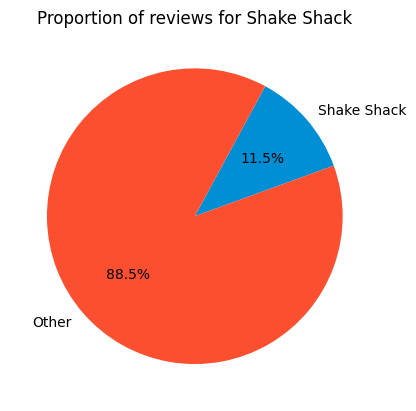

In [ ]:
labels = ['Shake Shack', 'Other']
sizes = [proportion, 1-proportion]
colors = ["#008fd5", "#fc4f30"]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=20)
plt.title("Proportion of reviews for Shake Shack")
plt.show()

##2.3 Sentimental Analysis

###Task 13

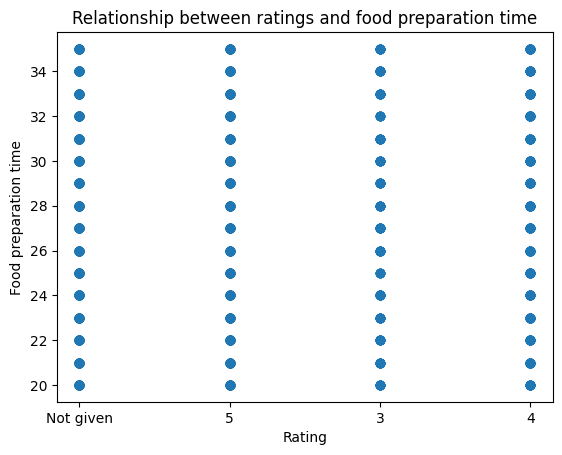

In [ ]:
plt.scatter(df_food['rating'], df_food['food_preparation_time'])
plt.xlabel("Rating")
plt.ylabel("Food preparation time")
plt.title("Relationship between ratings and food preparation time")

plt.show()

#Rating is low if the food preparation time is high for every restaurants
#also true for high rating if the food preparation time is low 

#Part 2

##2.1 Data Loading

###Task 1

In [ ]:
df_tweet = pd.read_csv("/content/tweets.csv")
df_tweet.head()

,Tweets,Retweets,Likes,Date
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32


###Task 2

In [ ]:
df_tweet.tail(10)

,Tweets,Retweets,Likes,Date
3050,@cybrtrkguy Vote them out,7712,68748,2022-01-27 23:41:28
3051,"If you scare people enough, they will demand r...",119804,543466,2022-01-27 23:39:57
3052,Seems odd that the UN still hasn’t released 20...,32799,262118,2022-01-27 22:24:24
3053,@jayvasdigital Freedom is being stripped away ...,12348,63170,2022-01-27 22:05:43
3054,@LimitingThe @baglino Manganese also requires ...,128,2543,2022-01-27 22:03:29
3055,@LimitingThe @baglino Just that manganese is a...,171,3173,2022-01-27 22:01:06
3056,@incentives101 @ICRicardoLara Exactly,145,4234,2022-01-27 21:23:20
3057,@ICRicardoLara Your policies are directly resp...,421,6144,2022-01-27 21:13:57
3058,@ICRicardoLara You should be voted out of office,484,7029,2022-01-27 21:12:27
3059,CB radios are free from govt/media control,11302,113429,2022-01-27 21:00:09


###Task 3

In [ ]:
import re

In [ ]:
url_regex = r"http\S+|www\.\S+"
df_tweet['cleaned_tweet'] = df_tweet['Tweets'].apply(lambda x: re.sub(url_regex, '', x))
df_tweet 

,Tweets,Retweets,Likes,Date,cleaned_tweet
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,@PeterSchiff 🤣 thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,@ZubyMusic Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48,@BillyM2k 👻
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting a lot of cool people at Twitter today!
...,...,...,...,...,...
3055,@LimitingThe @baglino Just that manganese is a...,171,3173,2022-01-27 22:01:06,@LimitingThe @baglino Just that manganese is a...
3056,@incentives101 @ICRicardoLara Exactly,145,4234,2022-01-27 21:23:20,@incentives101 @ICRicardoLara Exactly
3057,@ICRicardoLara Your policies are directly resp...,421,6144,2022-01-27 21:13:57,@ICRicardoLara Your policies are directly resp...
3058,@ICRicardoLara You should be voted out of office,484,7029,2022-01-27 21:12:27,@ICRicardoLara You should be voted out of office


###Task 4

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))

df_tweet['cleaned_tweet'] = df_tweet['cleaned_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

df_tweet.head()

,Tweets,Retweets,Likes,Date,cleaned_tweet
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,@PeterSchiff 🤣 thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,@ZubyMusic Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48,@BillyM2k 👻
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting lot cool people Twitter today!


In [ ]:
df_tweet['cleaned_tweet'][0]

'@PeterSchiff 🤣 thanks'

###Task 5

In [ ]:
df_tweet['cleaned_tweet'] = df_tweet['cleaned_tweet'].apply(lambda x: re.sub(r'@\w+', '', x))
df_tweet.head()

,Tweets,Retweets,Likes,Date,cleaned_tweet
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,🤣 thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48,👻
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting lot cool people Twitter today!


###Task 6

In [ ]:
df_tweet['cleaned_tweet'] = df_tweet['cleaned_tweet'].apply(lambda x: re.sub(r'#(\w+)', r'\1', x))
df_tweet.head()

,Tweets,Retweets,Likes,Date,cleaned_tweet
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,🤣 thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48,👻
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting lot cool people Twitter today!


###Task 7

In [ ]:
import string

def remove_punctuation(text):
    return text.translate(str.maketrans('','', string.punctuation))

df_tweet['cleaned_tweet'] = df_tweet['cleaned_tweet'].apply(lambda x: remove_punctuation(x))

df_tweet.head()

,Tweets,Retweets,Likes,Date,cleaned_tweet
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,🤣 thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48,👻
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting lot cool people Twitter today


###Task 8

In [ ]:
df_tweet['cleaned_tweet'] = df_tweet['cleaned_tweet'].str.replace('RT ', '')
df_tweet.head()


,Tweets,Retweets,Likes,Date,cleaned_tweet
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,🤣 thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48,👻
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting lot cool people Twitter today


###Task 9

In [ ]:
df_tweet['cleaned_tweet'] = df_tweet['cleaned_tweet'].str.replace('[^A-Za-z0-9]', ' ', flags=re.UNICODE)

<ipython-input-45-1c5f24399191>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_tweet['cleaned_tweet'] = df_tweet['cleaned_tweet'].str.replace('[^A-Za-z0-9]', ' ', flags=re.UNICODE)


In [ ]:
df_tweet.head()

,Tweets,Retweets,Likes,Date,cleaned_tweet,cleaned_tweet_emoji
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks,thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely,Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers,Dear Twitter Advertisers
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48,,
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting lot cool people Twitter today,Meeting lot cool people Twitter today


###Task 10

In [ ]:
df_tweet['cleaned_tweet'] = df_tweet['cleaned_tweet'].str.strip()
df_tweet

,Tweets,Retweets,Likes,Date,cleaned_tweet,cleaned_tweet_emoji
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks,thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely,Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers,Dear Twitter Advertisers
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48,,
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting lot cool people Twitter today,Meeting lot cool people Twitter today
...,...,...,...,...,...,...
3055,@LimitingThe @baglino Just that manganese is a...,171,3173,2022-01-27 22:01:06,Just manganese alternative iron amp phosphorus...,Just manganese alternative iron amp phosphorus...
3056,@incentives101 @ICRicardoLara Exactly,145,4234,2022-01-27 21:23:20,Exactly,Exactly
3057,@ICRicardoLara Your policies are directly resp...,421,6144,2022-01-27 21:13:57,Your policies directly responsible outrageousl...,Your policies directly responsible outrageousl...
3058,@ICRicardoLara You should be voted out of office,484,7029,2022-01-27 21:12:27,You voted office,You voted office


In [ ]:
# df_tweet = df_tweet.drop('cleaned_tweet_emoji', axis = 1)
# df_tweet.head()

,Tweets,Retweets,Likes,Date,cleaned_tweet
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48,
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting lot cool people Twitter today


###Task 11

In [ ]:
import nltk
nltk.download('punkt')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = nltk.word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(word) for word in words])
    
df_tweet['cleaned_tweet'] = df_tweet['cleaned_tweet'].apply(lemmatize_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df_tweet.head(15)

,Tweets,Retweets,Likes,Date,cleaned_tweet
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48,
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting lot cool people Twitter today
5,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58,Entering Twitter HQ let sink in
6,@dogeofficialceo @mtaibbi 🤣💪,194,3611,2022-10-26 17:18:30,
7,@mtaibbi 🤣,117,2848,2022-10-26 17:14:07,
8,@ARodTV Definitely closer to citizen journalis...,699,10189,2022-10-26 17:05:16,Definitely closer citizen journalism local new...
9,@sandyleevincent Nobody bats 1000 🤷‍♂️,126,2920,2022-10-26 15:42:50,Nobody bat 1000


In [ ]:
# df_tweet = df_tweet.drop('lemmatized_text', axis=1)

###Task 12

In [ ]:
df_tweet['tweet_cleand'] = df_tweet['cleaned_tweet']

In [ ]:
df_tweet.head()

,Tweets,Retweets,Likes,Date,cleaned_tweet,tweet_cleand
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks,thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely,Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers,Dear Twitter Advertisers
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48,,
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting lot cool people Twitter today,Meeting lot cool people Twitter today


###Task 13 (a)

In [ ]:
#We sometimes choose manual annotating a dataset because
#  when compared to automatic systems, manual annotation enables the 
# incorporation of more subtle and nuanced sentiment analysis.

# Also on the other hand choosing manual annotating is time consuming, expensive
# 

###Task 13 (b)

In [ ]:
#  Rule-based sentiment analysis
#  Machine learning based sentiment analysis

###Polarity

In [ ]:
from textblob import TextBlob
# Create a function to get the polarity
def getPolarity ( twt ):
  return TextBlob( twt ).sentiment.polarity

In [ ]:
df_tweet["Polarity"] = df_tweet['cleaned_tweet'].apply(getPolarity)

In [ ]:
df_tweet.head()

,Tweets,Retweets,Likes,Date,cleaned_tweet,tweet_cleand,Polarity
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks,thanks,0.20
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely,Absolutely,0.20
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers,Dear Twitter Advertisers,0.00
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48,,,0.00
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting lot cool people Twitter today,Meeting lot cool people Twitter today,0.35


###Task 14

In [ ]:
def get_sentiment(twt):
    polarity = TextBlob(twt).sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df_tweet['sentiment'] = df_tweet['cleaned_tweet'].apply(get_sentiment)
df_tweet.head(15)

,Tweets,Retweets,Likes,Date,cleaned_tweet,tweet_cleand,Polarity,sentiment
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks,thanks,0.200000,positive
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely,Absolutely,0.200000,positive
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers,Dear Twitter Advertisers,0.000000,neutral
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48,,,0.000000,neutral
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting lot cool people Twitter today,Meeting lot cool people Twitter today,0.350000,positive
5,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58,Entering Twitter HQ let sink in,Entering Twitter HQ let sink in,0.000000,neutral
6,@dogeofficialceo @mtaibbi 🤣💪,194,3611,2022-10-26 17:18:30,,,0.000000,neutral
7,@mtaibbi 🤣,117,2848,2022-10-26 17:14:07,,,0.000000,neutral
8,@ARodTV Definitely closer to citizen journalis...,699,10189,2022-10-26 17:05:16,Definitely closer citizen journalism local new...,Definitely closer citizen journalism local new...,0.000000,neutral
9,@sandyleevincent Nobody bats 1000 🤷‍♂️,126,2920,2022-10-26 15:42:50,Nobody bat 1000,Nobody bat 1000,0.000000,neutral


###Task 15

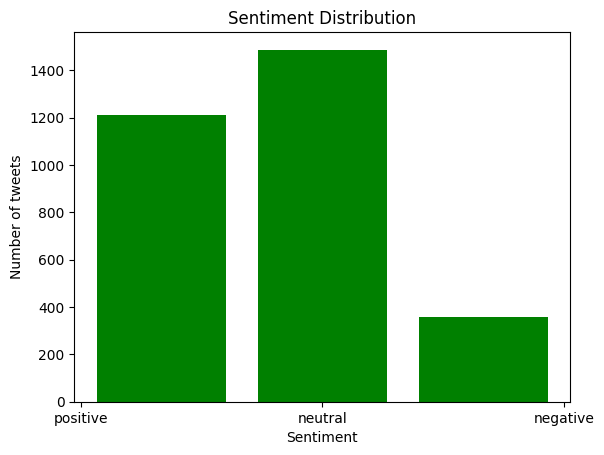

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df_tweet['sentiment'], bins=3, color='green', histtype='bar', rwidth=0.8)

plt.xlabel('Sentiment')
plt.ylabel("Number of tweets")

plt.title("Sentiment Distribution")

plt.show()

In [ ]:
#The neutral sentiment is most amongst them with the number above 1400 tweets.
# then  positive having the number of 1200 tweets 
# and finally negative sentiment is the lowest which is lower then 400 tweets

###Task 16 (a)

In [ ]:
positive_df = df_tweet[df_tweet['sentiment'] == 'positive']
negative_df = df_tweet[df_tweet['sentiment'] == 'negative']
neutral_df = df_tweet[df_tweet['sentiment'] == 'neutral']

def get_most_common_words(df, n=10):
    text = " ".join(df['tweet_cleand'].str.lower().tolist())
    words = text.split()
    return pd.Series(words).value_counts().nlargest(n)

positive_words = get_most_common_words(positive_df)
negative_words = get_most_common_words(negative_df)
neutral_words = get_most_common_words(neutral_df)

print("Top 10 most common words in positive sentiment:")
print(positive_words)
print("\nTop 10 most common words in negative sentiment:")
print(negative_words)
print("\nTop 10 most common words in neutral sentiment:")
print(neutral_words)


Top 10 most common words in positive sentiment:
i         215
amp       154
s         114
good       98
t          86
tesla      79
true       71
the        66
people     65
it         65
dtype: int64

Top 10 most common words in negative sentiment:
i        99
amp      88
s        45
it       40
t        34
the      31
tesla    31
year     23
would    21
one      21
dtype: int64

Top 10 most common words in neutral sentiment:
i        124
yes       65
s         45
amp       43
tesla     40
the       39
t         33
yeah      31
it        31
year      30
dtype: int64


###Task 16(b)

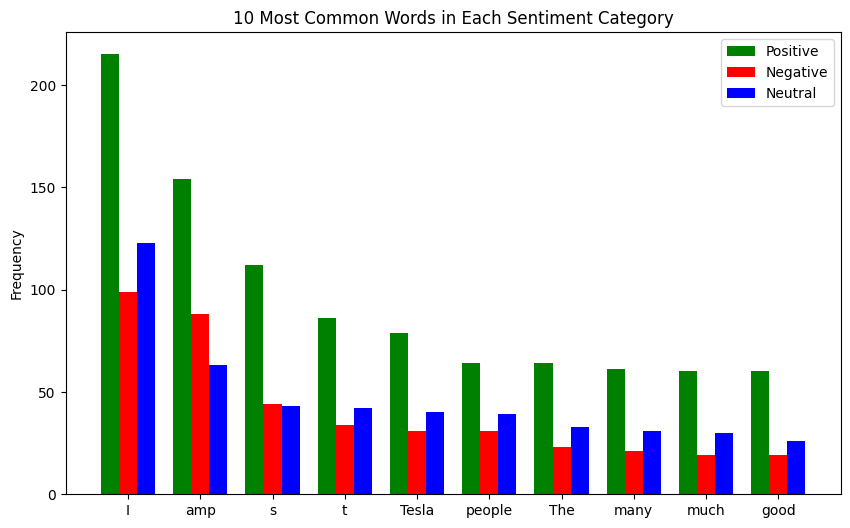

In [ ]:
from collections import Counter

pos_words = Counter(" ".join(df_tweet[df_tweet['sentiment'] == 'positive']['tweet_cleand']).split()).most_common(10)
neg_words = Counter(" ".join(df_tweet[df_tweet['sentiment'] == 'negative']['tweet_cleand']).split()).most_common(10)
neu_words = Counter(" ".join(df_tweet[df_tweet['sentiment'] == 'neutral']['tweet_cleand']).split()).most_common(10)

pos_words, pos_freqs = zip(*pos_words)
neg_words, neg_freqs = zip(*neg_words)
neu_words, neu_freqs = zip(*neu_words)

x_labels = [f"Word {i}" for i in range(1, 11)]
bar_width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x_labels, pos_freqs, width=bar_width, color='green', label='Positive')
ax.bar([x + bar_width for x in range(len(neg_freqs))], neg_freqs, width=bar_width, color='red', label='Negative')
ax.bar([x + bar_width*2 for x in range(len(neu_freqs))], neu_freqs, width=bar_width, color='blue', label='Neutral')

ax.set_ylabel('Frequency')
ax.set_title('10 Most Common Words in Each Sentiment Category')
ax.set_xticks([x + bar_width for x in range(len(pos_words))])
ax.set_xticklabels(pos_words)
ax.legend()

plt.show()

In [ ]:
##In positive sentiment I is the most used word while
# it is also the most used word in negative sentiment and neutral sentiment

# the word 'people' has the lowest occurance for the positive tweet,
# 'much' for the negative tweet
# 'many' for the neutral tweet

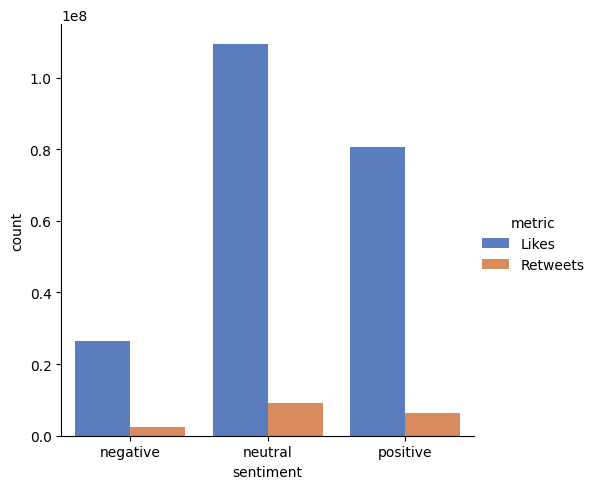

In [ ]:
import seaborn as sns

sentiment_data = df_tweet.groupby('sentiment')[['Likes', 'Retweets']].sum()
sentiment_data = sentiment_data.reset_index()
sentiment_data = sentiment_data.melt(id_vars='sentiment', var_name='metric', value_name='count')
sns.catplot(x='sentiment', y='count', hue='metric', data=sentiment_data, kind='bar', palette='muted')
